In [1]:
import time
from tictactoe.game import TicTacToe
from tictactoe.human import Human
from tictactoe.agent import Agent

# AI vs Human

In [8]:
player1 = Agent('AI')
player2 = Human('Human')

In [30]:
board = TicTacToe(player1, player2)

In [28]:
display(board)
time.sleep(0.1)
board.next_turn()
display(board)

AI1 chooses move 8


# AI vs AI

In [47]:
playerX = Agent('AI1')
playerY = Agent('AI2')

In [3]:
board = TicTacToe(playerX, playerY)

while not board.finished:
    board.next_turn()
    
display(board)

AI1 chooses move 7
AI2 chooses move 5
AI1 chooses move 4
AI2 chooses move 2
AI1 chooses move 1
AI1 WINS!!!!!!!!! *CONFETTI*


In [51]:
history = {
    playerX: [0],
    playerY: [0],
    None: [0]
}

playerX.learning_rate = 0.05
playerX.explore = 0.1
playerY.learning_rate = 0
playerY.explore = 0.1
# playerX.explore = 0
# playerY.explore = 1

board = TicTacToe(playerX, playerY)

for i in range(10000):
    board.print = False
    
    while not board.finished:
        board.next_turn()
        
    for p in history:
        history[p].append(history[p][-1])
    
    history[board.winner][-1] += 1
        
    board.reset()
    board.turn_p1 = i % 2  # take turns in starting
    
print("FINISHED!")
print(playerX.name, history[playerX][-1])
print(playerY.name, history[playerY][-1])

FINISHED!
AI1 6038
AI2 3871


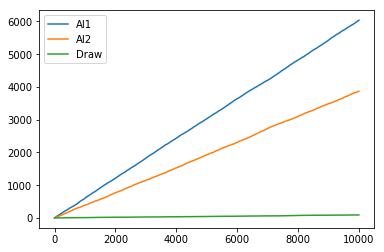

In [52]:
import matplotlib.pyplot as plt

plt.plot(history[playerX], label=playerX.name)
plt.plot(history[playerY], label=playerY.name)
plt.plot(history[None], label='Draw')
plt.legend()
plt.show()

In [7]:
playerX.states

OrderedDict([('XXX******', 1),
             ('***XXX***', 1),
             ('******XXX', 1),
             ('X**X**X**', 1),
             ('*X**X**X*', 1),
             ('**X**X**X', 1),
             ('X***X***X', 1),
             ('**X*X*X**', 1),
             ('------X--', 0.9638721260755874),
             ('---XO-X--', 0.9839418049610248),
             ('XO-XO-X--', 0.95),
             ('-------X-', 0.9983820604790343),
             ('OX-----X-', 0.9511765826467067),
             ('OX--XO-X-', 0.95),
             ('--X-O----', 0.5131576246666272),
             ('--X------', 0.9282879267212419),
             ('X-X--O---', 0.5),
             ('XOX--OX--', 0.55),
             ('XOXOXOX--', 0.95),
             ('----X---O', 0.5),
             ('---XXO--O', 0.5),
             ('-X-------', 0.938733381838462),
             ('-X--OO-XX', 0.5),
             ('---X----O', 0.5),
             ('-XO----X-', 0.9601865034909189),
             ('--X-OO--X', 0.6658661003043905),
             ('---X-

In [39]:
playerX.explore = 0
board = TicTacToe(playerX, player2)

In [44]:
display(board)
time.sleep(0.1)
board.next_turn()
display(board)

AI1 chooses move 5
AI1 WINS!!!!!!!!! *CONFETTI*
